# Temporality

This notebook compare the results when modelling an application as 1 ptask versus a sequence of ptasks.

In [22]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [23]:
import sys 
import os
import math
import datetime
import os
import json
import re
import pprint
import pandas as pd
from subprocess import *
import subprocess
import numpy as np
from importlib import reload  # Python 3.4+ only.
from IPython.display import Image

cwd = os.getcwd()
print(cwd)
# Adapt this path, it needs to point on the folder containing experiments/exptools.py.
sys.path.insert(1, os.path.abspath("src"))
import analysis
reload(analysis)

/home/adfaure/Projects/ptask-eval/analysis


<module 'analysis' from '/home/adfaure/Projects/ptask-eval/analysis/src/analysis.py'>

In [24]:
master_host="10.158.20.3"
server="10.158.20.2"
client="10.158.24.2"

profile=  "../experiments/simgrid/data/test.json"
hostfile= "../experiments/simgrid/hostfiles/smpi_hostfile"
csv_path = "../experiments/simgrid/data"


In [25]:
profile =  "../experiments/simgrid/data/paje_nbhost-32_nbrank-256_dims-80000.0_subdivisions-50/profile.json"

p = subprocess.run(" ".join(["../experiments/simgrid/b/main", "../experiments/simgrid/platforms/parasilo.xml",
    master_host,
    "-p", profile,
    "-H", hostfile, "> {}/no_interference_tcpkali_actor.csv".format(csv_path) ]), stdout = subprocess.PIPE, stderr = subprocess.PIPE, shell = True)

print(p.stderr.decode())

for (idle, inter) in [(10, 10), (30, 30), (10, 20), (20, 10), (0, 10)]:
    process = subprocess.run(" ".join(["../experiments/simgrid/b/main",
      "interference",
      "../experiments/simgrid/platforms/parasilo.xml",
      master_host,
      "-H", hostfile,
      "-s", server, "-c" ,client,
      "-p", profile, "-t", str(inter), "-d", str(idle),
      " > {}/{}inter_{}idle_tcpkali_actor.csv".format(csv_path ,str(inter), str(idle))]), shell = True, stdout = subprocess.PIPE, stderr = subprocess.PIPE)


[0.000000] [xbt_cfg/INFO] Configuration change: Set 'host/model' to 'ptask_L07'
[0.000000] [xbt_cfg/INFO] Switching to the L07 model to handle parallel tasks.
main: /nix/store/14nww40kd38pl3pilg91zl7cb2kf9zvi-rapidjson-1.1.0/include/rapidjson/filereadstream.h:45: rapidjson::FileReadStream::FileReadStream(FILE*, char*, std::size_t): Assertion `fp_ != 0' failed.
/bin/sh: line 1: 21272 Aborted                 (core dumped) ../experiments/simgrid/b/main ../experiments/simgrid/platforms/parasilo.xml 10.158.20.3 -p ../experiments/simgrid/data/paje_nbhost-32_nbrank-256_dims-80000.0_subdivisions-50/profile.json -H ../experiments/simgrid/hostfiles/smpi_hostfile > ../experiments/simgrid/data/no_interference_tcpkali_actor.csv



In [26]:
profile =  "../experiments/simgrid/data/paje_nbhost-32_nbrank-256_dims-80000.0_subdivisions-50/aggregated_50.json"

p = subprocess.run(" ".join(["../experiments/simgrid/b/main", "../experiments/simgrid/platforms/parasilo.xml",
    master_host,
    "-p", profile,
    "-H", hostfile, "> {}/no_interference_tcpkali_actor_sequence_50.csv".format(csv_path) ]), stdout = subprocess.PIPE, stderr = subprocess.PIPE, shell = True)

print(p.stderr.decode())

for (idle, inter) in [(10, 10), (30, 30), (10, 20), (20, 10), (0, 10)]:
    process = subprocess.run(" ".join(["../experiments/simgrid/b/main",
      "interference",
      "../experiments/simgrid/platforms/parasilo.xml",
      master_host,
      "-H", hostfile,
      "-s", server, "-c" ,client,
      "-p", profile, "-t", str(inter), "-d", str(idle),
      " > {}/{}inter_{}idle_tcpkali_actor_sequence_50.csv".format(csv_path ,str(inter), str(idle))]), shell = True, stdout = subprocess.PIPE, stderr = subprocess.PIPE)


[0.000000] [xbt_cfg/INFO] Configuration change: Set 'host/model' to 'ptask_L07'
[0.000000] [xbt_cfg/INFO] Switching to the L07 model to handle parallel tasks.
profile type:composed
[10.158.20.3:simulation:(1) 320.000000] [mwe/INFO] Parallel task finished
[320.000000] [mwe/INFO] Simulation done.



In [27]:
profile =  "../experiments/simgrid/data/paje_nbhost-32_nbrank-256_dims-80000.0_subdivisions-50/aggregated_16.json"

p = subprocess.run(" ".join(["../experiments/simgrid/b/main", "../experiments/simgrid/platforms/parasilo.xml",
    master_host,
    "-p", profile,
    "-H", hostfile, "> {}/no_interference_tcpkali_actor_sequence_16.csv".format(csv_path) ]), stdout = subprocess.PIPE, stderr = subprocess.PIPE, shell = True)

print(p.stderr.decode())

for (idle, inter) in [(10, 10), (30, 30), (10, 20), (20, 10), (0, 10)]:
    process = subprocess.run(" ".join(["../experiments/simgrid/b/main",
      "interference",
      "../experiments/simgrid/platforms/parasilo.xml",
      master_host,
      "-H", hostfile,
      "-s", server, "-c" ,client,
      "-p", profile, "-t", str(inter), "-d", str(idle),
      " > {}/{}inter_{}idle_tcpkali_actor_sequence_16.csv".format(csv_path ,str(inter), str(idle))]), shell = True, stdout = subprocess.PIPE, stderr = subprocess.PIPE)
    # print(process.stderr.decode())

[0.000000] [xbt_cfg/INFO] Configuration change: Set 'host/model' to 'ptask_L07'
[0.000000] [xbt_cfg/INFO] Switching to the L07 model to handle parallel tasks.
profile type:composed
[10.158.20.3:simulation:(1) 350.000000] [mwe/INFO] Parallel task finished
[350.000000] [mwe/INFO] Simulation done.



Print the runtimes for each instance of each configuration.

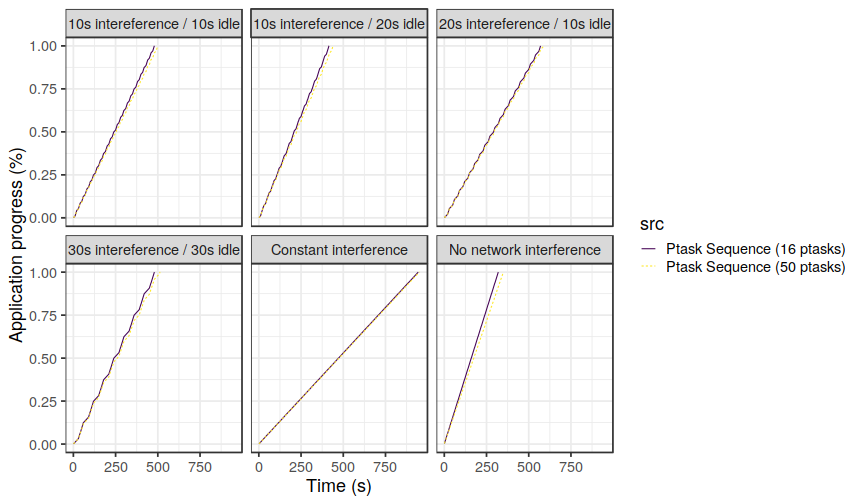

In [28]:
%%R -w 12 -h 7 --units in

library(tidyverse)
library(ggplot2)
library(viridis)

theme_set(theme_bw())

ptask_tcpkali_actor = read_csv("../experiments/simgrid/data/no_interference_tcpkali_actor.csv") %>% mutate(noise = "No network interference") %>%
    bind_rows(read_csv("../experiments/simgrid/data/10inter_0idle_tcpkali_actor.csv")  %>% mutate(noise = "Constant interference")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/10inter_10idle_tcpkali_actor.csv") %>% mutate(noise = "10s intereference / 10s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/10inter_20idle_tcpkali_actor.csv") %>% mutate(noise = "10s intereference / 20s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/20inter_10idle_tcpkali_actor.csv") %>% mutate(noise = "20s intereference / 10s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/30inter_30idle_tcpkali_actor.csv") %>% mutate(noise = "30s intereference / 30s idle")) %>% 
    mutate(src = "Ptask (tcpkali is s4u::actor)")

ptask_tcpkali_actor_seq16 = read_csv("../experiments/simgrid/data/no_interference_tcpkali_actor_sequence_50.csv") %>% mutate(noise = "No network interference") %>%
    bind_rows(read_csv("../experiments/simgrid/data/10inter_0idle_tcpkali_actor_sequence_50.csv")  %>% mutate(noise = "Constant interference")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/10inter_10idle_tcpkali_actor_sequence_50.csv") %>% mutate(noise = "10s intereference / 10s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/10inter_20idle_tcpkali_actor_sequence_50.csv") %>% mutate(noise = "10s intereference / 20s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/20inter_10idle_tcpkali_actor_sequence_50.csv") %>% mutate(noise = "20s intereference / 10s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/30inter_30idle_tcpkali_actor_sequence_50.csv") %>% mutate(noise = "30s intereference / 30s idle")) %>% 
    mutate(src = "Ptask Sequence (16 ptasks)")
    
ptask_tcpkali_actor_seq50 = read_csv("../experiments/simgrid/data/no_interference_tcpkali_actor_sequence_16.csv") %>% mutate(noise = "No network interference") %>%
    bind_rows(read_csv("../experiments/simgrid/data/10inter_0idle_tcpkali_actor_sequence_16.csv")  %>% mutate(noise = "Constant interference")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/10inter_10idle_tcpkali_actor_sequence_16.csv") %>% mutate(noise = "10s intereference / 10s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/10inter_20idle_tcpkali_actor_sequence_16.csv") %>% mutate(noise = "10s intereference / 20s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/20inter_10idle_tcpkali_actor_sequence_16.csv") %>% mutate(noise = "20s intereference / 10s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/30inter_30idle_tcpkali_actor_sequence_16.csv") %>% mutate(noise = "30s intereference / 30s idle")) %>% 
    mutate(src = "Ptask Sequence (50 ptasks)")

    
ptask = bind_rows(ptask_tcpkali_actor, ptask_tcpkali_actor_seq16, ptask_tcpkali_actor_seq50) %>% mutate(kind = "Ptask")
# ptask = ptask_tcpkali_actor_seq 


ptask %>%
    ggplot(aes(y = progress, x = time, colour = noise)) +
    geom_line() + facet_wrap(~src) + scale_color_viridis_d(end = 1) + theme_bw(base_size = 18) + ggsave("/tmp/lol.png")
    
ptask %>%
    ggplot(aes(y = progress, x = time, colour = src, linetype = src)) +
    ylab("Application progress (%)") + xlab("Time (s)") +
    geom_line() + facet_wrap(~noise) + scale_color_viridis_d(end = 1) +
    theme_bw(base_size = 18) + 
    ggsave("/tmp/comparison.png")
    

Merge everything togethers

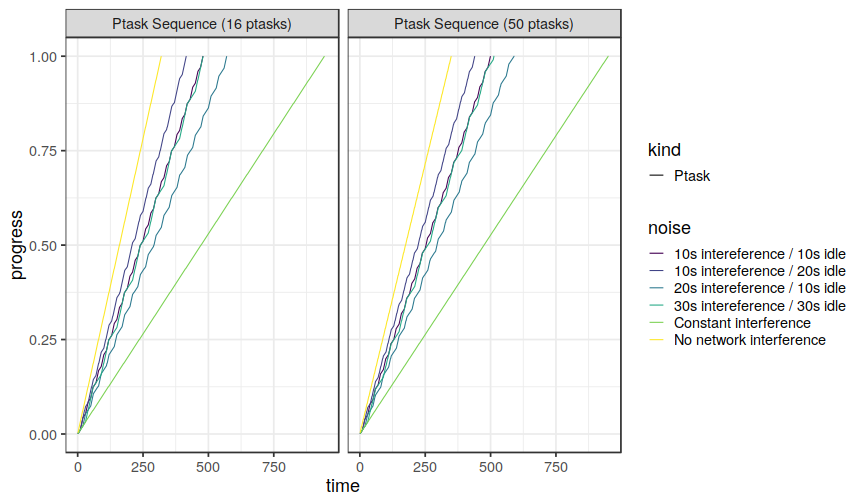

In [29]:
%%R  -w 12 -h 7 --units in

ptask %>%
    ggplot(aes(y = progress, x = time, colour = noise, linetype = kind)) +
    geom_line() + facet_wrap(~src) + scale_color_viridis_d(end = 1) + theme_bw(base_size = 18)

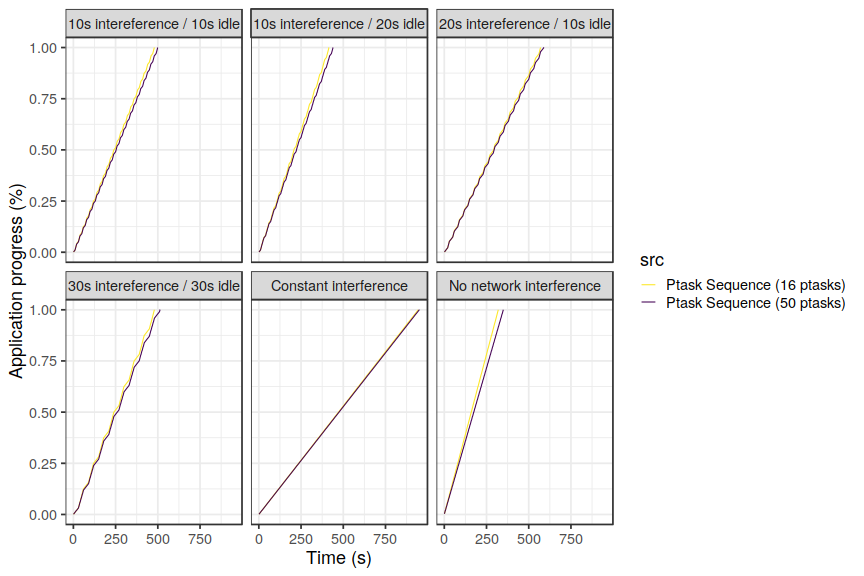

In [30]:
%%R  -w 12 -h 8 --units in

ptask %>%
    ggplot(aes(y = progress, x = time, colour = src)) +
    ylab("Application progress (%)") + xlab("Time (s)") +
    geom_line() + facet_wrap(~noise) + scale_color_viridis_d(end = 1, direction = -1) + theme_bw(base_size = 18)
